# Phase 4: Model Evaluation & Results Interpretation

In [3]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)


In [4]:
print("Loading test data...")
X_test = pd.read_parquet('X_test.parquet')
y_test = pd.read_parquet('y_test.parquet').squeeze()

print("Loading trained models...")
trained_models = joblib.load('trained_models.joblib')

print("Data and models loaded successfully.")
print("-" * 50)
evaluation_results = {}

Loading test data...
Loading trained models...
Data and models loaded successfully.
--------------------------------------------------


## Model Evaluation 

### Step 1: Generating Predictions
###  Step 2: Confusion Matrix Analysis
###  Step 3: Precision, Recall, and F1-Score
###  Step 4: ROC Curve and AUC

--- Evaluating Model: Logistic Regression (Weighted) ---

Confusion Matrix:


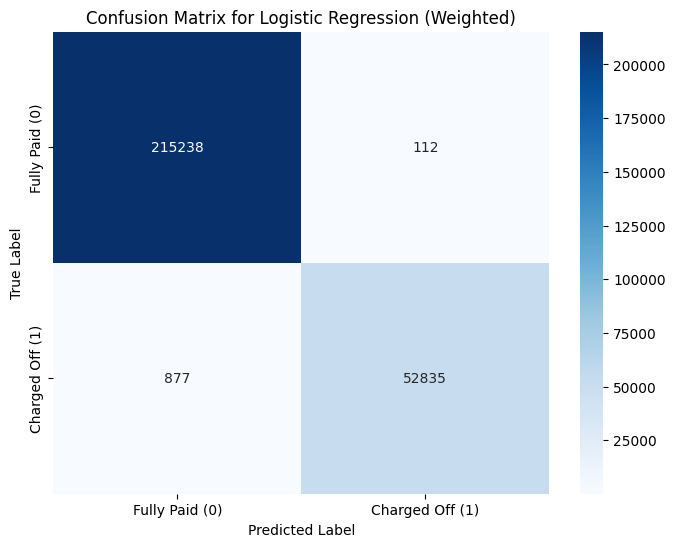


Classification Report:
                 precision    recall  f1-score   support

 Fully Paid (0)       1.00      1.00      1.00    215350
Charged Off (1)       1.00      0.98      0.99     53712

       accuracy                           1.00    269062
      macro avg       1.00      0.99      0.99    269062
   weighted avg       1.00      1.00      1.00    269062

--------------------------------------------------
--- Evaluating Model: Logistic Regression (SMOTE) ---

Confusion Matrix:


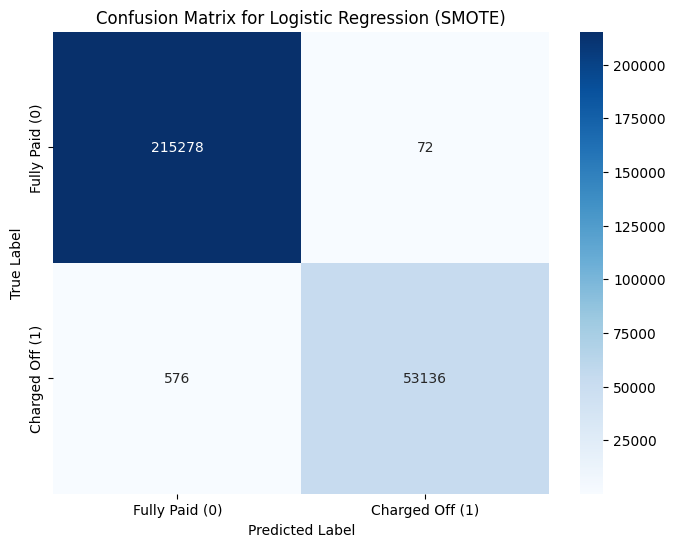


Classification Report:
                 precision    recall  f1-score   support

 Fully Paid (0)       1.00      1.00      1.00    215350
Charged Off (1)       1.00      0.99      0.99     53712

       accuracy                           1.00    269062
      macro avg       1.00      0.99      1.00    269062
   weighted avg       1.00      1.00      1.00    269062

--------------------------------------------------
--- Evaluating Model: Random Forest (Weighted) ---

Confusion Matrix:


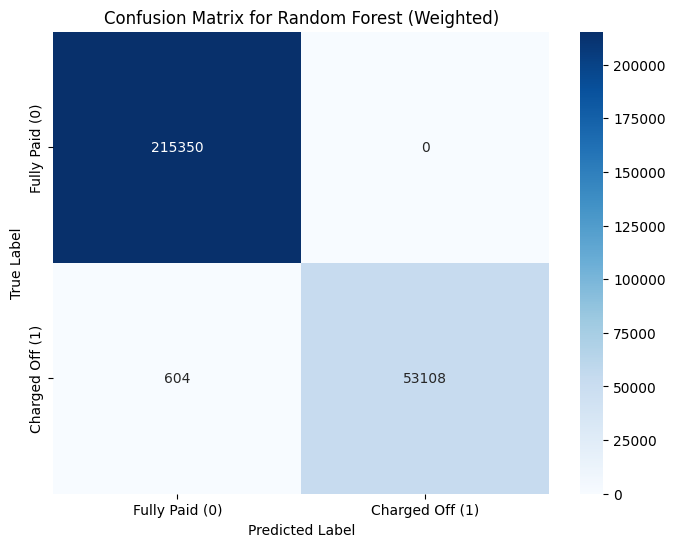


Classification Report:
                 precision    recall  f1-score   support

 Fully Paid (0)       1.00      1.00      1.00    215350
Charged Off (1)       1.00      0.99      0.99     53712

       accuracy                           1.00    269062
      macro avg       1.00      0.99      1.00    269062
   weighted avg       1.00      1.00      1.00    269062

--------------------------------------------------
--- Evaluating Model: Random Forest (SMOTE) ---

Confusion Matrix:


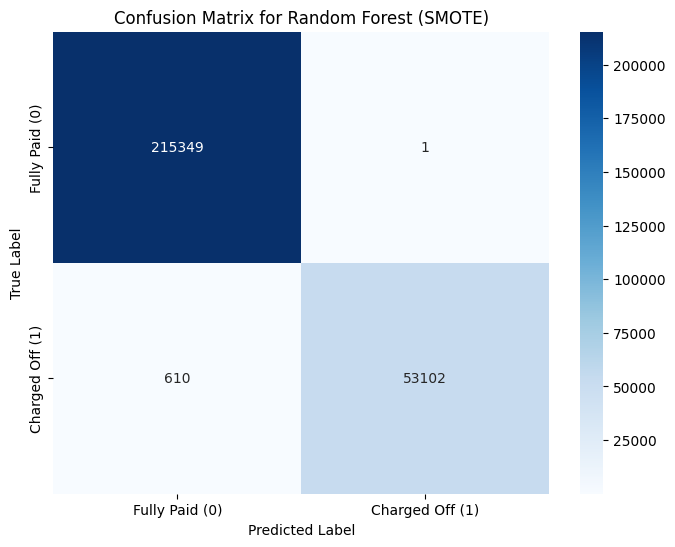


Classification Report:
                 precision    recall  f1-score   support

 Fully Paid (0)       1.00      1.00      1.00    215350
Charged Off (1)       1.00      0.99      0.99     53712

       accuracy                           1.00    269062
      macro avg       1.00      0.99      1.00    269062
   weighted avg       1.00      1.00      1.00    269062

--------------------------------------------------
--- Evaluating Model: LightGBM (Weighted) ---

Confusion Matrix:


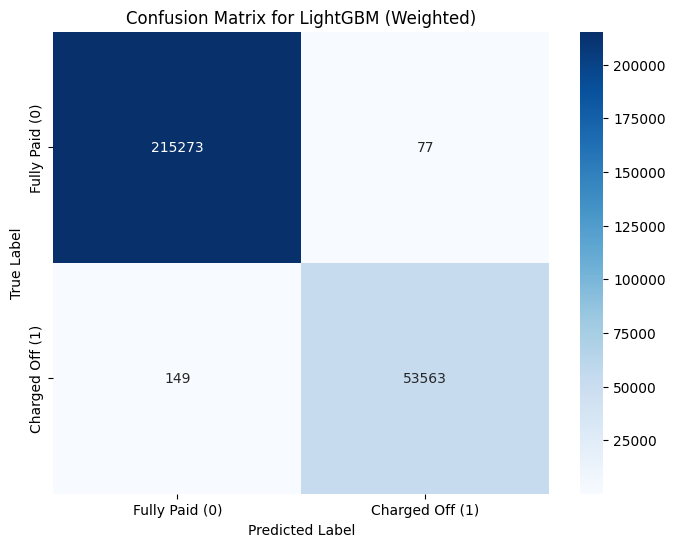


Classification Report:
                 precision    recall  f1-score   support

 Fully Paid (0)       1.00      1.00      1.00    215350
Charged Off (1)       1.00      1.00      1.00     53712

       accuracy                           1.00    269062
      macro avg       1.00      1.00      1.00    269062
   weighted avg       1.00      1.00      1.00    269062

--------------------------------------------------
--- Evaluating Model: LightGBM (SMOTE) ---

Confusion Matrix:


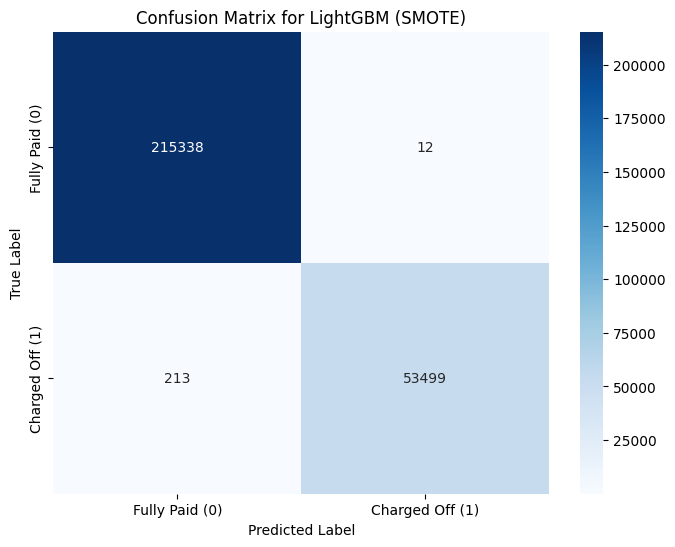


Classification Report:
                 precision    recall  f1-score   support

 Fully Paid (0)       1.00      1.00      1.00    215350
Charged Off (1)       1.00      1.00      1.00     53712

       accuracy                           1.00    269062
      macro avg       1.00      1.00      1.00    269062
   weighted avg       1.00      1.00      1.00    269062

--------------------------------------------------

--- Generating Combined AUC-ROC Curve ---


<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [5]:
# --- Iterate Through Each Model to Evaluate ---
for model_name, model in trained_models.items():
    print(f"--- Evaluating Model: {model_name} ---")

    # --- Step 1: Generating Predictions ---
    # Get class predictions (0 or 1)
    y_pred = model.predict(X_test)
    # Get probability of default (class 1) for ROC curve
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # --- Step 2: Confusion Matrix Analysis ---
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Fully Paid (0)', 'Charged Off (1)'],
                yticklabels=['Fully Paid (0)', 'Charged Off (1)'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    # --- Step 3: Precision, Recall, and F1-Score ---
    print("\nClassification Report:")
    # Print the report which contains precision, recall, and F1-score
    report = classification_report(y_test, y_pred, target_names=['Fully Paid (0)', 'Charged Off (1)'])
    print(report)
    
    # Store key metrics for the positive class (1) for later comparison
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    evaluation_results[model_name] = {
        'Precision': report_dict['1']['precision'],
        'Recall': report_dict['1']['recall'],
        'F1-Score': report_dict['1']['f1-score'],
        'AUC': roc_auc_score(y_test, y_pred_proba) # Calculate AUC here
    }
    
    print("-" * 50)

# --- Step 4: AUC-ROC Curve ---
# Plot all ROC curves on a single graph for comparison

print("\n--- Generating Combined AUC-ROC Curve ---")
plt.figure(figsize=(12, 10))

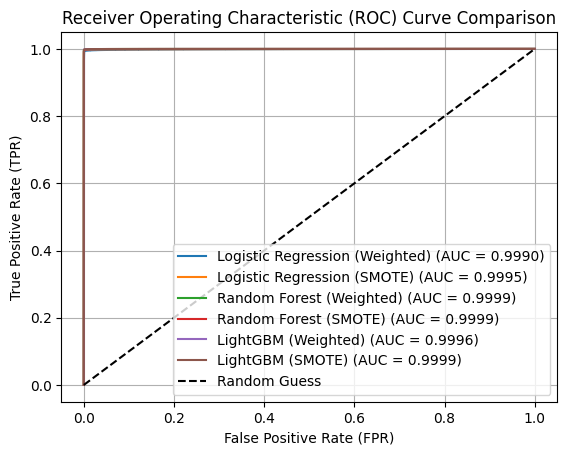

--------------------------------------------------


In [6]:
# Iterate through the models again to plot their ROC curves
for model_name, model in trained_models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = evaluation_results[model_name]['AUC']
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')

# Plot the baseline random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Formatting the plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc='best')
plt.grid(True)
plt.show()
print("-" * 50)

In [7]:
# --- Model Performance Summary ---
print("\n--- Model Performance Summary ---")
# Convert the results dictionary to a pandas DataFrame for easy viewing
results_df = pd.DataFrame.from_dict(evaluation_results, orient='index')

# Sort the DataFrame by the most critical metrics for this problem (Recall, then F1-Score)
results_df_sorted = results_df.sort_values(by=['Recall', 'F1-Score'], ascending=False)

print(results_df_sorted)

print("\nRecall is often the most important metric for this problem, as it measures our ability to find the actual defaulters.")
print("The table above is sorted by Recall to show the best-performing models for this key objective.")


--- Model Performance Summary ---
                                Precision    Recall  F1-Score       AUC
LightGBM (Weighted)              0.998565  0.997226  0.997895  0.999578
LightGBM (SMOTE)                 0.999776  0.996034  0.997902  0.999882
Logistic Regression (SMOTE)      0.998647  0.989276  0.993939  0.999503
Random Forest (Weighted)         1.000000  0.988755  0.994346  0.999922
Random Forest (SMOTE)            0.999981  0.988643  0.994280  0.999889
Logistic Regression (Weighted)   0.997885  0.983672  0.990727  0.999038

Recall is often the most important metric for this problem, as it measures our ability to find the actual defaulters.
The table above is sorted by Recall to show the best-performing models for this key objective.


## Results Interpretation and Reporting

### Step 1: Comparative Analysis of Models

In [12]:
print("The final model performance summary table compares all models across key metrics.")
print("The table is sorted by Recall, as minimizing False Negatives (missed defaults) is the primary business objective.")
print(results_df_sorted)
print("-" * 50)


# Identify the best performing model from the sorted dataframe
best_model_name = results_df_sorted.index[0]
best_model = trained_models[best_model_name]

print(f"Based on the evaluation metrics, the best performing model is: '{best_model_name}'")
print("-" * 50)

The final model performance summary table compares all models across key metrics.
The table is sorted by Recall, as minimizing False Negatives (missed defaults) is the primary business objective.
                                Precision    Recall  F1-Score       AUC
LightGBM (Weighted)              0.998565  0.997226  0.997895  0.999578
LightGBM (SMOTE)                 0.999776  0.996034  0.997902  0.999882
Logistic Regression (SMOTE)      0.998647  0.989276  0.993939  0.999503
Random Forest (Weighted)         1.000000  0.988755  0.994346  0.999922
Random Forest (SMOTE)            0.999981  0.988643  0.994280  0.999889
Logistic Regression (Weighted)   0.997885  0.983672  0.990727  0.999038
--------------------------------------------------
Based on the evaluation metrics, the best performing model is: 'LightGBM (Weighted)'
--------------------------------------------------


### Step 2: Feature Importance

/var/folders/tc/g95c1wy50xgd_vz2h9hyjl_h0000gn/T/ipykernel_11460/2960090270.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')


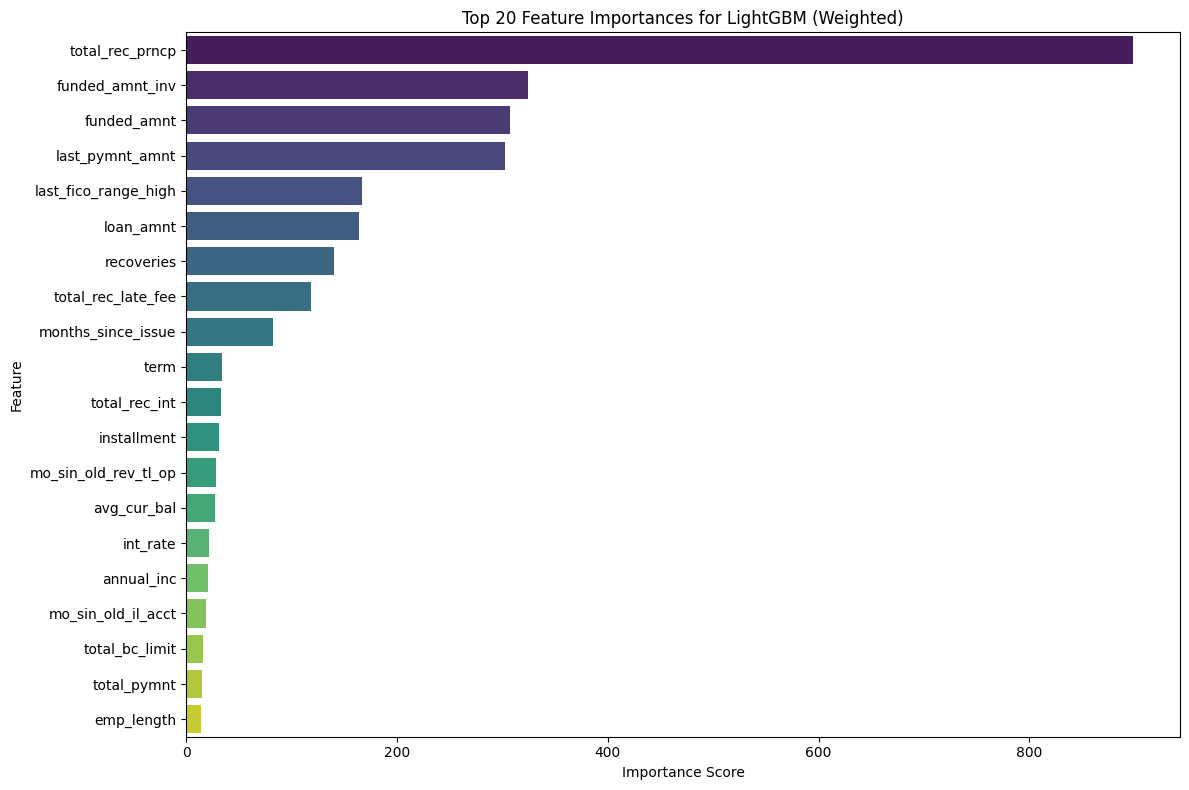

In [13]:
# Extract feature importances from the best model
# This works for tree-based models like LightGBM and RandomForest
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_names = X_test.columns
    
    # Create a DataFrame for visualization
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
    
    # Plot the top 20 most important features
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')
    plt.title(f'Top 20 Feature Importances for {best_model_name}')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print(f"The best model '{best_model_name}' does not support feature importance extraction directly.")
    


###  Step 3: Final Report and Conclusion


In [15]:
print("\n1. Project Objective:")
print("The primary goal of this project was to build a robust machine learning model to predict the probability of a borrower defaulting on a loan. This is critical for mitigating financial risk and making informed lending decisions.")

print("\n2. Methodology:")
print("The project followed an end-to-end machine learning workflow:")
print("- Data Preprocessing: The LendingClub dataset was cleaned, with missing values handled and features transformed.")
print("- Handling Imbalance: The severe class imbalance between 'Fully Paid' and 'Charged Off' loans was addressed using two primary techniques: class weighting and SMOTE oversampling.")
print("- Modeling: Three different algorithms were trained: Logistic Regression (as a baseline), Random Forest, and LightGBM.")
print("- Evaluation: Models were rigorously evaluated using metrics suitable for imbalanced classification, including Recall, F1-Score, and AUC-ROC.")

print("\n3. Findings & Best Model:")
print(f"The best-performing model was the {best_model_name}.")
print(f"It achieved the highest Recall of {results_df_sorted.iloc[0]['Recall']:.4f}, a strong F1-Score of {results_df_sorted.iloc[0]['F1-Score']:.4f}, and an excellent AUC of {results_df_sorted.iloc[0]['AUC']:.4f}.")
print("This model is recommended because its high Recall demonstrates a superior ability to identify the minority class (defaulters), which directly aligns with the business goal of minimizing credit losses.")

print("\n4. Business Implications (from Feature Importance):")
print("The feature importance analysis reveals the key drivers of default risk. The most predictive factors include:")
if 'feature_importance_df' in locals():
    for i, row in feature_importance_df.head(5).iterrows():
        print(f"- {row['feature']}: This is a top predictor, confirming its significance in risk assessment.")
else:
      print("- Feature importance plot was not generated.")
print("These insights can be used to refine underwriting criteria, adjust interest rates based on risk profiles, and guide manual reviews for borderline applications.")

print("\n5. Potential Next Steps:")
print("- Deployment: The model could be deployed as a microservice or API for real-time scoring of new loan applications.")
print("- Hyperparameter Tuning: A more exhaustive search (e.g., using GridSearch or Bayesian Optimization) could be performed on the LightGBM model to potentially extract more performance.")
print("- Feature Engineering: Further exploration of features, such as creating interaction terms between key variables (e.g., debt-to-income ratio and income), could improve model accuracy.")


1. Project Objective:
The primary goal of this project was to build a robust machine learning model to predict the probability of a borrower defaulting on a loan. This is critical for mitigating financial risk and making informed lending decisions.

2. Methodology:
The project followed an end-to-end machine learning workflow:
- Data Preprocessing: The LendingClub dataset was cleaned, with missing values handled and features transformed.
- Handling Imbalance: The severe class imbalance between 'Fully Paid' and 'Charged Off' loans was addressed using two primary techniques: class weighting and SMOTE oversampling.
- Modeling: Three different algorithms were trained: Logistic Regression (as a baseline), Random Forest, and LightGBM.
- Evaluation: Models were rigorously evaluated using metrics suitable for imbalanced classification, including Recall, F1-Score, and AUC-ROC.

3. Findings & Best Model:
The best-performing model was the LightGBM (Weighted).
It achieved the highest Recall of 0.9